https://dacon.io/competitions/open/235874/codeshare/4618?page=1&dtype=tag&fType&category=codeshare
# ResNet 구현 및 수정하기 (public 0.915)

In [1]:
import site
print(site.getsitepackages())

['c:\\Users\\smlle\\anaconda3', 'c:\\Users\\smlle\\anaconda3\\Lib\\site-packages']


In [1]:
import tensorflow as tf 
tf.config.list_logical_devices()

2023-11-26 13:19:44.317231: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-26 13:19:44.404242: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-26 13:19:48.349377: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7923 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe MIG 1g.10gb, pci bus id: 0000:d5:00.0, compute capability: 8.0


[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [2]:
import os
import warnings
warnings.filterwarnings(action='ignore')

os.environ["CUDA_VISIBLE_DEVICES"]="0" # GPU 할당

In [3]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import shutil
import glob
import seaborn as sns
import tensorflow as tf
from  tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, InputLayer, Resizing
from tensorflow.keras.layers import Conv2D, BatchNormalization
from tensorflow.keras.layers import MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Flatten, RandomRotation, RandomTranslation, RandomFlip, RandomContrast
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import cohen_kappa_score
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental import preprocessing

In [4]:
base_path = './'

train_df = pd.read_csv(os.path.join(base_path, 'train.csv'))

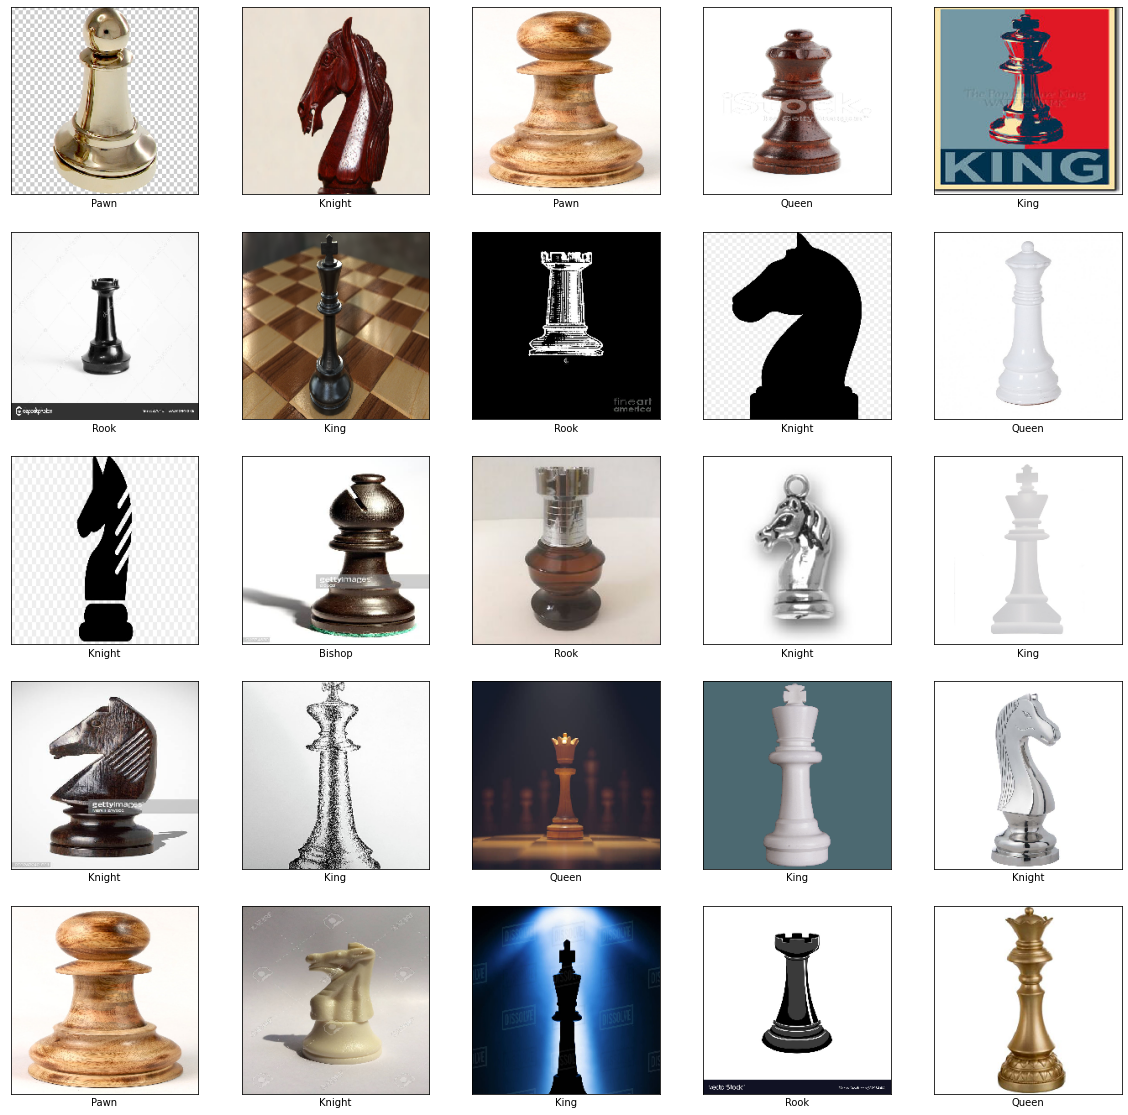

In [5]:
train_path = base_path +'/train'


plt.figure(figsize=(20,20))
index = np.random.randint(len(train_df), size=25)
for i in range(25):
    label = train_df['label'][index[i]]
    path_img = train_df['image'][index[i]]
    path_img = os.path.join(train_path, os.path.join(label, path_img))
    
    img = image.load_img(path_img,target_size=(224,224))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img, cmap=plt.cm.binary)
    plt.xlabel(label)
plt.show()

In [11]:
# #create training dataset
# from glob import glob
# import numpy as np
# import PIL
# from PIL import Image

# path = './train/'
# classes = ['King', 'Bishop', 'Queen', 'Knight', 'Pawn', 'Rook']

# training_images = []
# training_labels = []

# for class_name in classes:
#     class_path = path + class_name + '/'
#     for img in glob(class_path + "*.jpg"):
#         an_img = PIL.Image.open(img)  # 이미지 읽기
#         img_array = np.array(an_img)  # 이미지를 배열로 변환
#         training_images.append(img_array)  # 배열을 training_images 리스트에 추가
#         training_labels.append(class_name)  # 레이블 추가
        
# # path = base_path +'/train'

# # training_images = []
# # training_labels = []

# # for filename in glob(path +"*"):
# #     for img in glob(filename + "/*.jpg"):
# #         an_img = PIL.Image.open(img) #read img
# #         img_array = np.array(an_img)  
# #         training_images.append(img_array) #append array to training_images
# #         label = filename.split('\\')[-1] #get label
# #         training_labels.append(label) #append label
        
# training_images = np.array(training_images)
# training_labels = np.array(training_labels)

# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# training_labels= le.fit_transform(training_labels)
# training_labels = training_labels.reshape(-1,1)

# print(training_images.shape)
# print(training_labels.shape)
 

# aa
# # # #create training dataset
# # from glob import glob
# # import numpy as np
# # import PIL
# # from PIL import Image

# # path = './train/'

# # training_images = []
# # training_labels = []

# # for filename in glob(path +"*"):
# #     for img in glob(filename + "/*.jpg"):
# #         an_img = PIL.Image.open(img) #read img
# #         img_array = np.array(an_img) #img to array         np.array(an_img.resize((224, 224)))   ## 
# #         training_images.append(img_array) #append array to training_images
# #         label = filename.split('\\')[-1] #get label
# #         training_labels.append(label) #append label
        
# # training_images = np.array(training_images)
# # training_labels = np.array(training_labels)

# # from sklearn.preprocessing import LabelEncoder

# # le = LabelEncoder()
# # training_labels= le.fit_transform(training_labels)
# # training_labels = training_labels.reshape(-1,1)

# # print(training_images.shape)
# # print(training_labels.shape)

(412,)
(412,)


NameError: name 'plt' is not defined

In [4]:
#create test dataset

path = './test/'

test_images = []
test_idx = []

flist = sorted(glob(path + '*.jpg'))

for filename in flist:
    an_img = PIL.Image.open(filename) #read img
    img_array = np.array(an_img) #img to array
    test_images.append(img_array) #append array to training_images 
    label = filename.split('\\')[-1] #get id 
    test_idx.append(label) #append id
    
test_images = np.array(test_images)

print(test_images.shape)
print(test_idx[0:5])

(53,)
['./test/test_0.jpg', './test/test_1.jpg', './test/test_12.jpg', './test/test_13.jpg', './test/test_14.jpg']


# **데이터 전처리**

data augmentation을 통한 데이터 생성
vertical_flip은 사용하지 않습니다. Mixup은 TTA를 위해서 사용하지 않았습니다.

Test Time Augmention 및 Data Augmentation의 강도를 정할때 아래 사이트의 의견을 참고했습니다.

https://towardsdatascience.com/test-time-augmentation-tta-and-how-to-perform-it-with-keras-4ac19b67fb4d

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

tf.random.set_seed(42)

image_generator = ImageDataGenerator(
    rotation_range=20,
    brightness_range = [0.6, 1.0],
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
)


training_labels_one_hot = tf.keras.utils.to_categorical(training_labels)  # 라벨을 One-Hot Encoding으로 변환

In [6]:
training_image_aug = image_generator.flow(training_images, training_labels_one_hot, batch_size=16, shuffle=False, seed = 42).next()[0]
training_image_aug_2 = image_generator.flow(training_images, training_labels_one_hot, batch_size=16, shuffle=False, seed = 42^2).next()[0]
training_image_aug_3 = image_generator.flow(training_images, training_labels_one_hot, batch_size=16, shuffle=False, seed = 42^3).next()[0]
training_image_aug_4 = image_generator.flow(training_images, training_labels_one_hot, batch_size=16, shuffle=False, seed = 42^4).next()[0]

ValueError: setting an array element with a sequence.

==================================

In [ ]:
# import numpy as np
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # 임의의 이미지 데이터 생성 (예시)
# training_images = np.random.rand(412, image_shape)

# # 각 이미지에 대한 레이블을 생성 (예시: 이미지마다 레이블은 0부터 411까지로 설정)
# training_labels = np.arange(0, 412).reshape(-1, 1)

# image_generator = ImageDataGenerator(
#     rotation_range=20,
#     brightness_range=[0.6, 1.0],
#     zoom_range=0.2,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=False
# )

# # 데이터 증강
# training_image_aug = image_generator.flow(training_images, training_labels, batch_size=412, shuffle=False, seed=42).next()[0]
# training_image_aug_2 = image_generator.flow(training_images, training_labels, batch_size=412, shuffle=False, seed=42^2).next()[0]
# training_image_aug_3 = image_generator.flow(training_images, training_labels, batch_size=412, shuffle=False, seed=42^3).next()[0]
# training_image_aug_4 = image_generator.flow(training_images, training_labels, batch_size=412, shuffle=False, seed=42^4).next()[0]


In [ ]:
# training_images = np.concatenate((training_images, 
#                                   training_image_aug, 
#                                   training_image_aug_2, 
#                                   training_image_aug_3, 
#                                   training_image_aug_4))

# training_labels = np.concatenate((training_labels, 
#                                   training_labels, 
#                                   training_labels, 
#                                   training_labels, 
#                                   training_labels))

# training_labels = tf.one_hot(training_labels, 10) #one-hot 기법 적용
# training_labels = np.array(training_labels)
# training_labels = training_labels.reshape(-1,10) #one-hot 기법을 적용했다면, shape을 바꿔줍니다.

In [10]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(train_df, test_size=0.25, stratify=train_df['label'])
train = train.reset_index(drop=True)
valid = valid.reset_index(drop=True)

In [11]:
train['image'] = train['image'].map(lambda x: x.split('_')[0]+'/'+x)
train.head(10)

,image,label
0,Bishop/Bishop_39.jpg,Bishop
1,Knight/Knight_77.jpg,Knight
2,Rook/Rook_48.jpg,Rook
3,King/King_56.jpg,King
4,Pawn/Pawn_1.png,Pawn
5,Rook/Rook_12.jpg,Rook
6,Bishop/Bishop_19.jpg,Bishop
7,King/King_10.jpg,King
8,Rook/Rook_55.png,Rook
9,Pawn/Pawn_73.jpg,Pawn


In [13]:
valid['image'] = valid['image'].map(lambda x: x.split('_')[0]+'/'+x)
valid.head(10)

,image,label
0,Pawn/Pawn_11.png,Pawn
1,Queen/Queen_40.jpg,Queen
2,King/King_26.jpg,King
3,King/King_51.jpg,King
4,Knight/Knight_24.jpg,Knight
5,King/King_38.jpg,King
6,Knight/Knight_16.jpg,Knight
7,Rook/Rook_17.jpg,Rook
8,Queen/Queen_21.jpg,Queen
9,Bishop/Bishop_15.jpg,Bishop


In [14]:
# 데이터 증강

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
# labels = ['King', 'Queen' ,'Knight', 'Bishop', 'Rook', 'Pawn']


height, width, channel = (224, 224, 3)
batch_size = 16
labels = ['sunny', 'snow', 'rain', 'dust', 'fog']

train_datagen= ImageDataGenerator(rescale=1./255,
                              rotation_range=20,
                              width_shift_range=0.05,
                              height_shift_range=0.05,
                              zoom_range=[0.7, 1],
                              horizontal_flip=True,
                              vertical_flip=False,
                              fill_mode='nearest')



train_generator = train_datagen.flow_from_dataframe(train,
                                                   directory = train_path,
                                                   x_col='image',
                                                   y_col='label',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   color_mode= 'rgb',
                                                   target_size=(height, width))





valid_datagen = ImageDataGenerator(rescale=1. / 255.)

valid_generator = valid_datagen.flow_from_dataframe(valid,
                                                   directory = train_path,
                                                   x_col='image',
                                                   y_col='label',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   color_mode= 'rgb',
                                                   target_size=(height, width))

Found 368 validated image filenames belonging to 6 classes.
Found 123 validated image filenames belonging to 6 classes.


#  여기부터 베이스라인 ____________________________________


# -------------------------------------------------------

In [3]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import shutil
import glob
import seaborn as sns
import tensorflow as tf
from  tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, InputLayer, Resizing
from tensorflow.keras.layers import Conv2D, BatchNormalization
from tensorflow.keras.layers import MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Flatten, RandomRotation, RandomTranslation, RandomFlip, RandomContrast
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import cohen_kappa_score
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental import preprocessing

In [4]:
base_path = './'

train_df = pd.read_csv(os.path.join(base_path, 'train.csv'))

In [ ]:
train_df

,image,label
0,Bishop_0.JPG,Bishop
1,Bishop_1.jpg,Bishop
2,Bishop_10.jpg,Bishop
3,Bishop_11.jpg,Bishop
4,Bishop_12.jpg,Bishop
...,...,...
491,Rook_88.jpg,Rook
492,Rook_89.jpg,Rook
493,Rook_9.jpg,Rook
494,Rook_90.jpg,Rook


In [5]:
train_df.label.value_counts()

Pawn      97
Knight    96
Rook      92
Bishop    77
Queen     68
King      66
Name: label, dtype: int64

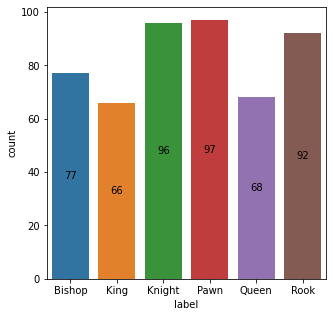

In [6]:
# 데이터 분포

figure = plt.figure(figsize=(5, 5))
ax = figure.add_subplot()
sns.countplot(data=train_df, x='label', ax=ax)

for patch in ax.patches:
    label_x = patch.get_x() + patch.get_width()/2
    label_y = patch.get_y() + patch.get_height()/2
    text_msg = str(int(patch.get_height())) 
    ax.text(label_x, label_y, text_msg, horizontalalignment='center', verticalalignment='center')
    
plt.show()

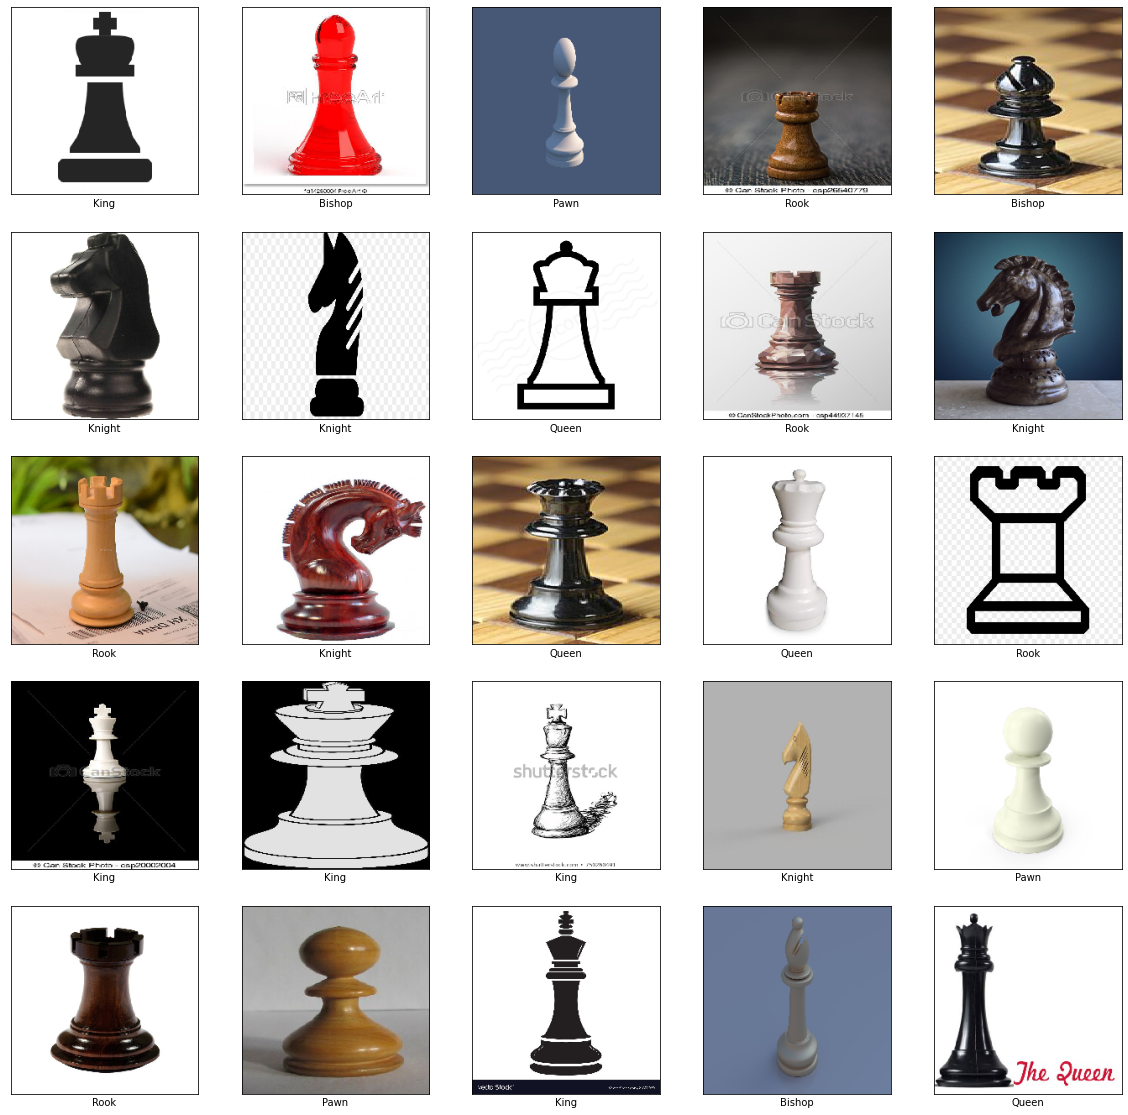

In [7]:
# 이미지 시각화
train_path = base_path +'/train'

plt.figure(figsize=(20,20))
index = np.random.randint(len(train_df), size=25)
for i in range(25):
    label = train_df['label'][index[i]]
    path_img = train_df['image'][index[i]]
    path_img = os.path.join(train_path, os.path.join(label, path_img))
    
    img = image.load_img(path_img,target_size=(224,224))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img, cmap=plt.cm.binary)
    plt.xlabel(label)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(train_df, test_size=0.25, stratify=train_df['label'])
train = train.reset_index(drop=True)
valid = valid.reset_index(drop=True)

In [9]:
train

,image,label
0,King_50.jpg,King
1,Pawn_65.jpg,Pawn
2,Queen_61.jpg,Queen
3,Queen_33.jpg,Queen
4,Queen_30.jpg,Queen
...,...,...
367,Rook_20.png,Rook
368,Pawn_16.fcgi,Pawn
369,Bishop_15.jpg,Bishop
370,Pawn_50.png,Pawn


In [10]:
train['image'] = train['image'].map(lambda x: x.split('_')[0]+'/'+x)
train.head(10)

,image,label
0,King/King_50.jpg,King
1,Pawn/Pawn_65.jpg,Pawn
2,Queen/Queen_61.jpg,Queen
3,Queen/Queen_33.jpg,Queen
4,Queen/Queen_30.jpg,Queen
5,Pawn/Pawn_9.jpg,Pawn
6,Queen/Queen_63.jpg,Queen
7,King/King_62.jpg,King
8,Rook/Rook_67.jpg,Rook
9,Bishop/Bishop_56.jpg,Bishop


In [11]:
valid['image'] = valid['image'].map(lambda x: x.split('_')[0]+'/'+x)
valid.head(10)

,image,label
0,Pawn/Pawn_7.jpg,Pawn
1,Pawn/Pawn_27.jpeg,Pawn
2,Knight/Knight_71.jpg,Knight
3,Queen/Queen_56.jpg,Queen
4,King/King_61.jpg,King
5,Knight/Knight_18.jpg,Knight
6,Rook/Rook_78.jpg,Rook
7,Bishop/Bishop_41.jpg,Bishop
8,Pawn/Pawn_4.jpg,Pawn
9,Pawn/Pawn_35.JPG,Pawn


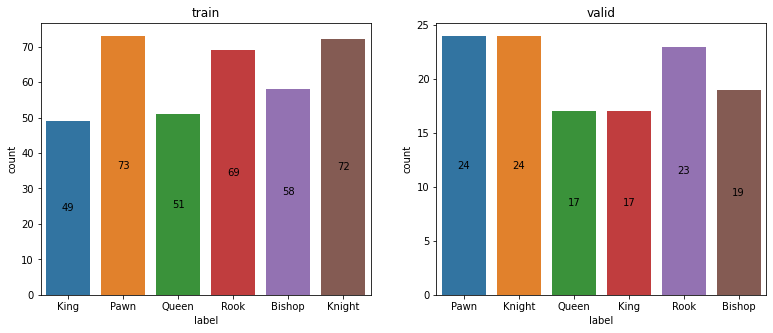

In [12]:
# 분할 후 데이터 분포

figure, ax = plt.subplots(1, 2, figsize=(13,5))
sns.countplot(data=train, x='label', ax=ax[0])
sns.countplot(data=valid, x='label', ax=ax[1])

ax[0].set_title('train')
for patch in ax[0].patches:
    label_x = patch.get_x() + patch.get_width()/2
    label_y = patch.get_y() + patch.get_height()/2
    text_msg = str(int(patch.get_height())) 
    ax[0].text(label_x, label_y, text_msg, horizontalalignment='center', verticalalignment='center')

ax[1].set_title('valid')
for patch in ax[1].patches:
    label_x = patch.get_x() + patch.get_width()/2
    label_y = patch.get_y() + patch.get_height()/2
    text_msg = str(int(patch.get_height())) 
    ax[1].text(label_x, label_y, text_msg, horizontalalignment='center', verticalalignment='center')

plt.show()

In [13]:
# 데이터 증강

height, width, channel = (224, 224, 3)
batch_size = 16
labels = ['sunny', 'snow', 'rain', 'dust', 'fog']

train_datagen= ImageDataGenerator(rescale=1./255,
                              rotation_range=20,
                              width_shift_range=0.05,
                              height_shift_range=0.05,
                              zoom_range=[0.7, 1],
                              horizontal_flip=True,
                              vertical_flip=False,
                              fill_mode='nearest')



train_generator = train_datagen.flow_from_dataframe(train,
                                                   directory = train_path,
                                                   x_col='image',
                                                   y_col='label',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   color_mode= 'rgb',
                                                   target_size=(height, width))





valid_datagen = ImageDataGenerator(rescale=1. / 255.)

valid_generator = valid_datagen.flow_from_dataframe(valid,
                                                   directory = train_path,
                                                   x_col='image',
                                                   y_col='label',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   color_mode= 'rgb',
                                                   target_size=(height, width))

Found 367 validated image filenames belonging to 6 classes.
Found 124 validated image filenames belonging to 6 classes.


/home/jovyan/.local/lib/python3.8/site-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 5 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


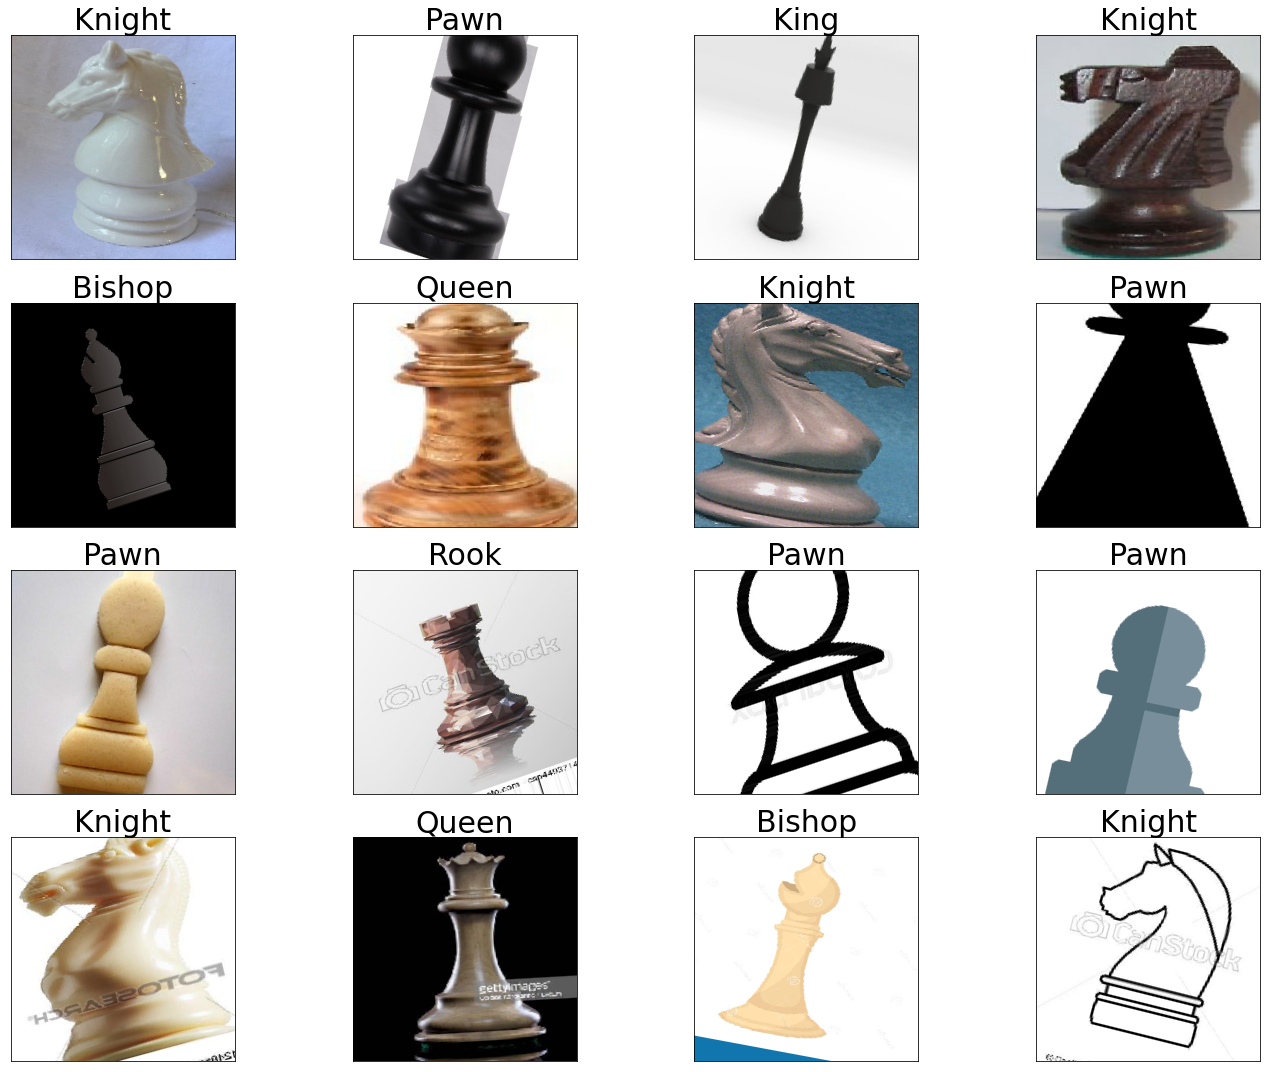

In [14]:
# 데이터 증강 시각화

pred2label={}
for x in train_generator.class_indices.keys():
    pred2label[train_generator.class_indices[x]] = x


plt.figure(figsize=(20,15))
index = np.random.randint(len(train_df), size=batch_size)
x_augs, y_augs = train_generator.next()
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_augs[i, :, :, :])
    plt.title(pred2label[np.argmax(y_augs[i, :])], fontsize=30)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
plt.tight_layout()
plt.show()

In [15]:
base_model = tf.keras.applications.VGG19(include_top = False) # Load the VGG19 model without the top layer
base_model.trainable = False # Freeze the base model layers to prevent backpropagation through them

inputs = tf.keras.Input(shape = (224, 224, 3)) # Input layer

x = base_model(inputs) # Pass the image through the base model
x = layers.Dropout(0.4)(x) # Apply dropout to prevent overfitting

x = layers.Conv2D(256, 3, activation = 'relu', padding = 'same')(x)
x = layers.Dropout(0.5)(x)

x = tf.keras.layers.GlobalMaxPooling2D()(x) # Perform global max pooling to reduce the spatial dimensions
x = layers.Dropout(0.6)(x)

x = layers.Dense(6)(x) # Output layer 
outputs = layers.Activation("softmax")(x) 

# Create the model
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(loss = "categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

2023-11-26 08:50:41.084332: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7923 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe MIG 1g.10gb, pci bus id: 0000:d5:00.0, compute capability: 8.0


In [16]:
print(height,  ' ', width, ' ', channel)

224   224   3


In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 dropout (Dropout)           (None, 7, 7, 512)         0         
                                                                 
 conv2d (Conv2D)             (None, 7, 7, 256)         1179904   
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 256)         0         
                                                                 
 global_max_pooling2d (Glob  (None, 256)               0         
 alMaxPooling2D)                                                 
                                                             

In [18]:
# 모델 컴파일 진행 - 아까와 달리 categorical_crossentropy 사용 > label이 숫자형 데이터이므로
model.compile(optimizer = Adam(learning_rate= 0.001),
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])


# 조기멈춤
stop = EarlyStopping(patience=5)

# 자동 저장
checkpoint = ModelCheckpoint("./best_model",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1,save_best_only=True)
callbacks = [stop, checkpoint]

# 모델 fitting
save = model.fit(train_generator,epochs = 20, validation_data=valid_generator, batch_size=32, callbacks=callbacks)

Epoch 1/20


2023-11-26 08:51:03.974783: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-11-26 08:51:05.620048: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:425] Loaded runtime CuDNN library: 8.2.0 but source was compiled with: 8.6.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
2023-11-26 08:51:05.621320: W tensorflow/core/framework/op_kernel.cc:1828] OP_REQUIRES failed at conv_ops_fused_impl.h:625 : UNIMPLEMENTED: DNN library is not found.


UnimplementedError: Graph execution error:

Detected at node 'model/vgg19/block1_conv1/Relu' defined at (most recent call last):
    File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.8/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.8/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/usr/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 353, in dispatch_shell
      await result
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_14385/1790007421.py", line 16, in <module>
      save = model.fit(train_generator,epochs = 20, validation_data=valid_generator, batch_size=32, callbacks=callbacks)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 1080, in train_step
      y_pred = self(x, training=True)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call
      return self.activation(outputs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/activations.py", line 321, in relu
      return backend.relu(
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/backend.py", line 5397, in relu
      x = tf.nn.relu(x)
Node: 'model/vgg19/block1_conv1/Relu'
DNN library is not found.
	 [[{{node model/vgg19/block1_conv1/Relu}}]] [Op:__inference_train_function_1990]

In [45]:
test_df = pd.read_csv(base_path + "/test.csv")
test_df.head(5)

,image,label
0,test_0.jpg,NaN
1,test_1.jpg,NaN
2,test_2.jpg,NaN
3,test_3.jpg,NaN
4,test_4.jpg,NaN


In [46]:
batch_size = len(test_df["image"])
height, width, channel = 224, 224, 3

In [47]:
# 테스트 이미지를 메모리에 올림.
test_path = base_path + '/test'

test_image = np.zeros((batch_size, height, width, channel))
print(test_image.shape)
cnt=0
for i in range(len(test_df["image"])):
    path_img = test_df['image'][i]
    img = image.load_img(os.path.join(test_path,path_img), target_size=(height, width))
    img_tensor = image.img_to_array(img)
    img_tensor = np.array(img_tensor,dtype="float32")

    img_tensor /= 255
    
    img_tensor = np.expand_dims(img_tensor, axis=0)
    
    test_image[i] = img_tensor

(60, 224, 224, 3)


In [49]:
predictions = model.predict(test_image)
predictions.shape

(60, 6)

In [50]:
test_df['label'] = [pred2label[np.argmax(pred)] for pred in predictions]
test_df

,image,label
0,test_0.jpg,Bishop
1,test_1.jpg,Knight
2,test_2.jpg,Bishop
3,test_3.jpg,Bishop
4,test_4.jpg,Pawn
5,test_5.jpg,King
6,test_6.jpg,Bishop
7,test_7.jpg,Bishop
8,test_8.jpg,Pawn
9,test_9.jpg,Bishop


In [51]:
test_df.to_csv('./submission.csv', index=False)

# ===========================================

# https://github.com/wonjin0403/dacon_object-classification-contest/blob/master/main.py

https://dacon.io/competitions/open/235874/codeshare/4657?page=1&dtype=recent

dataloader.py

In [ ]:
import torch
import torch.utils.data as data
import random
import numpy as np
import pandas as pd
import time
import os
import cv2
import h5py # why exists?
from glob import glob
import warnings
from collections import namedtuple
from PIL import Image
import matplotlib.pyplot as plt
from PIL import Image

class CIFAR10_Dataset(data.Dataset):
    def __init__(self, img_root, transforms=None):
        self.img_paths = glob(img_root + '/*/*')
        self.transforms = transforms
        if len(self.img_paths) == 0:
            raise ValueError("Check data path : %s"%(img_root))
        self.label_dict = {
            "airplane" : 0,
            "automobile" : 1,
            "bird" : 2,
            "cat" : 3,
            "deer" : 4,
            "dog" : 5,
            "frog" : 6,
            "horse" : 7,
            "ship" : 8,
            "truck" : 9
        }

    def __getitem__(self, idx):
        path_file = self.img_paths[idx]
        #image = cv2.imread(path_file)
        #image = np.array(image, dtype=np.float32)
        image = Image.open(path_file)
        if self.transforms is not None:
            image = self.transforms(image)
        label = np.zeros([10])
        label[self.label_dict[path_file.split("/")[-2]]] = 1
        
        return image, label

    def __len__(self):
        return len(self.img_paths)

class Inference_Dataset(data.Dataset):
    def __init__(self, img_root, csv_path, transforms=None):
        self.img_root = img_root
        self.img_paths = glob(img_root + '/*')
        self.pd_csv = pd.read_csv(csv_path)
        self.transforms = transforms
        if len(self.img_paths) == 0:
            raise ValueError("Check data path : %s"%(img_root))

    def __getitem__(self, idx):
        id = self.pd_csv["id"][idx]
        path_file = os.path.join(str(self.img_root), id)
        image = Image.open(path_file)
        if self.transforms is not None:
            image = self.transforms(image)
        
        return image.float()

    def __len__(self):
        return len(self.img_paths)

class WrapperDataset:
    def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.transform = transform

    def __getitem__(self, index):
        image, answer = self.dataset[index]

        if self.transform is not None:
            image = self.transform(image)

        answer = torch.from_numpy(answer)
        return image.float(), answer.float()

    def __len__(self):
        return len(self.dataset)

    

main.py

In [ ]:
import os
import random
import numpy as np
import torch
import argparse

from utils.arg_parser import parse_args
from Dataloader import CIFAR10_Dataset, Inference_Dataset
from trainers.Trainer import Trainer


def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # type: ignore
    torch.backends.cudnn.deterministic = True  # type: ignore
    torch.backends.cudnn.benchmark = True 

def main():

    # Input argument from shell script
    argparser = argparse.ArgumentParser()
    # INI script file name
    argparser.add_argument('inifile')
    # TODO: Add TensorboardX to store losses, metrics, and output images
    argparser.add_argument('--log_dir', nargs='?', help='Dir to save logs')
    cmd_args = argparser.parse_args()

    args = parse_args(cmd_args.inifile)

    # overwrite ini args with cmd args
    for k, v in cmd_args.__dict__.items():
        if v:
            # create non-existing directory
            if k.endswith('dir'):
                if not os.path.exists(v):
                    os.makedirs(v)

            args.__setattr__(k, v)
    
    seed_everything(args.seed)

    data_set = CIFAR10_Dataset(os.path.join(str(args.data_path), "new_train"))
    test_dataset = CIFAR10_Dataset(os.path.join(str(args.data_path), "new_test"))
    trainer = Trainer(args, data_set, test_dataset)

    if args.phase == 'train':
        trainer.train()
        trainer.test()
    elif args.phase == 'test':
        trainer.test()
    elif args.phase == 'inference':
        trainer.inference()
if __name__ == "__main__":
    main()

모델.py

In [ ]:
from efficientnet_pytorch import EfficientNet
import torch.nn as nn
from timm import create_model
import torchvision.models as models

class RESNET18(nn.Module):
    def __init__(self, out_channels):
        super(RESNET18, self).__init__()
        self.res18 = models.resnet18(pretrained=False)
        self.res18.fc = nn.Linear(in_features=self.res18.fc.in_features, out_features=out_channels)
        self.feature1 = nn.Sequential(*(list(self.res18.children())[0:8]))
        self.feature2 = nn.Sequential(list(self.res18.children())[8])
        self.feature3 = nn.Sequential(list(self.res18.children())[9])

    def forward(self, x):
        map = self.feature1(x)
        h1 = self.feature2(map)
        output = self.feature3(h1.reshape(h1.shape[0], -1))
        return output